In [1]:
#yolov8

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid17/yolov8_vid17.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v8_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()

# Display the mean confidence for each object

In [2]:
#yolov5

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid17/yolov5_vid17.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v5_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()


In [3]:
#yolov3

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid17/yolov3_vid17.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v3_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()


In [4]:
#detectron

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid17/detectron_17.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_det_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()

# Display the mean confidence for each object
print(mean_confidence_det_df)

            Object  Confidence
0            apple    0.154791
1         backpack    0.325372
2           banana    0.111183
3     baseball bat    0.059738
4   baseball glove    0.162256
5             bear    0.061650
6            bench    0.073044
7          bicycle    0.155791
8             bird    0.130348
9             boat    0.096382
10            book    0.125311
11          bottle    0.136116
12             bus    0.076223
13             car    0.168094
14             cat    0.075831
15      cell phone    0.094973
16           chair    0.107497
17             cup    0.070608
18             dog    0.251143
19        elephant    0.273894
20    fire hydrant    0.252722
21      hair drier    0.062527
22         handbag    0.230417
23           horse    0.095537
24      motorcycle    0.095935
25            oven    0.070357
26   parking meter    0.124081
27          person    0.997209
28    potted plant    0.078255
29    refrigerator    0.085501
30      skateboard    0.105491
31     s

In [5]:
#SSD

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid17/vid17-ssd.csv'
necessary_objects_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/classesForSSD.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame Number', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_ssd_df = unique_detections_df.groupby('Object')['Confidence Score'].mean().reset_index()

necessary_objects_df = pd.read_csv(necessary_objects_path)

filtered_mean_confidence_ssd_df = mean_confidence_ssd_df[mean_confidence_ssd_df['Object'].isin(necessary_objects_df['Objects'])]

In [6]:
import pandas as pd

df1 = mean_confidence_v8_df
df2 = mean_confidence_v5_df
df3 = mean_confidence_v3_df
df4 = filtered_mean_confidence_ssd_df
df5 = mean_confidence_det_df

# Identify unique objects across all dataframes
unique_objects = pd.unique(df1['Object'].tolist() + df2['Object'].tolist() + df3['Object'].tolist() +
                           df4['Object'].tolist() + df5['Object'].tolist())

# Create a new dataframe with unique objects
combined_df = pd.DataFrame(unique_objects, columns=['Object'])

# Merge the original dataframes with the new dataframe
combined_df = combined_df.merge(df1, on='Object', how='left').rename(columns={'Confidence': 'Confidence_1'})
combined_df = combined_df.merge(df2, on='Object', how='left').rename(columns={'Confidence': 'Confidence_2'})
combined_df = combined_df.merge(df3, on='Object', how='left').rename(columns={'Confidence': 'Confidence_3'})
combined_df = combined_df.merge(df4, on='Object', how='left').rename(columns={'Confidence Score': 'Confidence_4'})
combined_df = combined_df.merge(df5, on='Object', how='left').rename(columns={'Confidence': 'Confidence_5'})
combined_df = combined_df.fillna(0)

combined_df = combined_df[:12]
print(combined_df)
# Now combined_df has one column for objects and three columns for confidences

          Object  Confidence_1  Confidence_2  Confidence_3  Confidence_4  \
0       backpack      0.365022      0.347213      0.370653      0.335918   
1        bicycle      0.339661      0.380291      0.377511      0.282413   
2         bottle      0.329277      0.555394      0.000000      0.210131   
3            car      0.342171      0.000000      0.269890      0.500564   
4          chair      0.360345      0.000000      0.000000      0.215844   
5            dog      0.477254      0.474045      0.522799      0.194049   
6   fire hydrant      0.441926      0.353483      0.000000      0.221414   
7        handbag      0.394906      0.352397      0.340777      0.374397   
8         person      0.912137      0.901848      0.907007      0.727935   
9     skateboard      0.323734      0.270124      0.361888      0.229052   
10   sports ball      0.288524      0.000000      0.000000      0.220093   
11         train      0.262611      0.373569      0.000000      0.213404   

    Confide

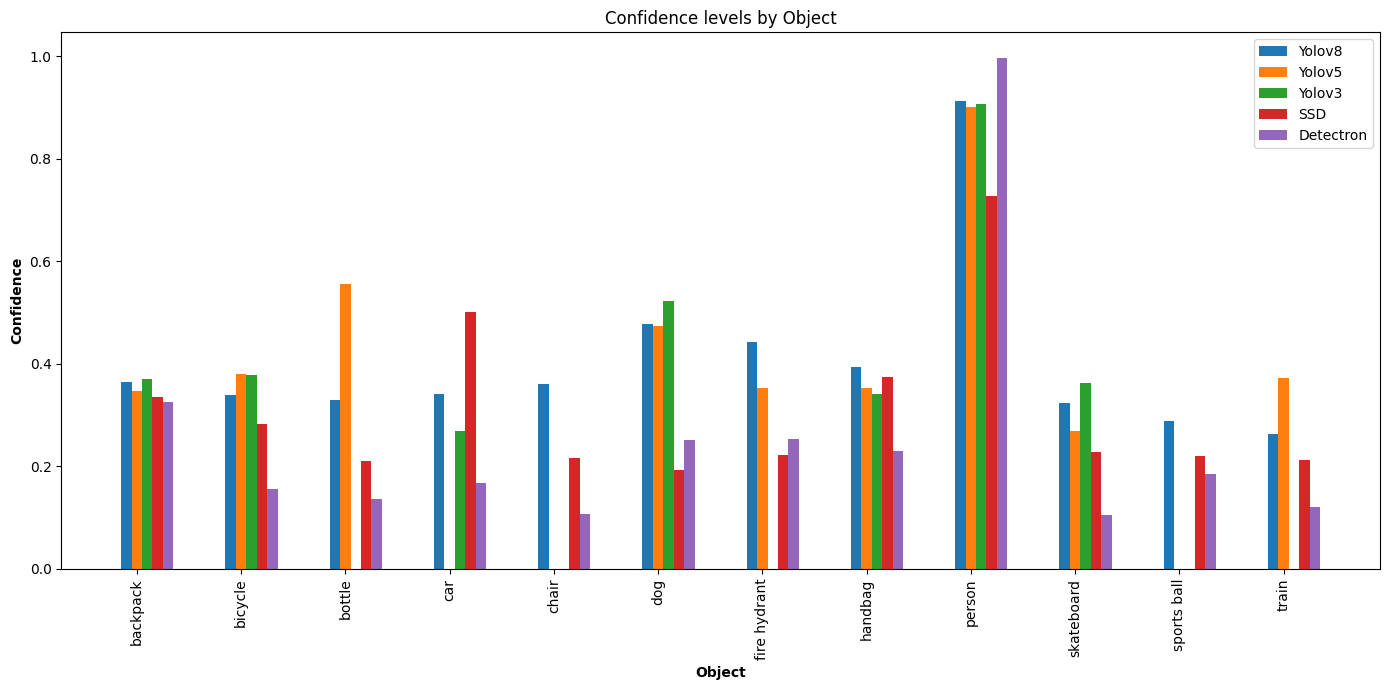

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size for better readability
plt.figure(figsize=(14, 7))

# Define the width of the bars
bar_width = 0.10

# Get the positions of the bars on the x-axis
index = np.arange(len(combined_df))

# Plotting the bars for each confidence
plt.bar(index, combined_df['Confidence_1'], width=bar_width, label='Yolov8')
plt.bar(index + bar_width, combined_df['Confidence_2'], width=bar_width, label='Yolov5')
plt.bar(index + 2*bar_width, combined_df['Confidence_3'], width=bar_width, label='Yolov3')
plt.bar(index + 3*bar_width, combined_df['Confidence_4'], width=bar_width, label='SSD')
plt.bar(index + 4*bar_width, combined_df['Confidence_5'], width=bar_width, label='Detectron')

# Add labels to the x-axis for each group of bars
plt.xlabel('Object', fontweight='bold')
plt.xticks(index + bar_width, combined_df['Object'], rotation=90)

# Add labels and title
plt.ylabel('Confidence', fontweight='bold')
plt.title('Confidence levels by Object')


# Create a legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()